# Training and evaluation of model

In this notebook, we will train and evaluate the implemented model.

In [1]:
import gym
import torch
import torch.optim as optim
from tqdm.notebook import tqdm

from dqn_implementation.training_evaluation import Predictor

In [2]:
env = gym.make('Breakout-v0')

# These parameters should be set once per DQN model - that enables multiple succesive trainings without loss of memory
hyperparameters = {
    "replay_memory_size": 10_000 + 1,
    "stacked_frames": 4,
    "env": env,
    "action_count": env.action_space.n,
    "replay_start_size": 500 + 1,
    "action_repeat": 4,
    "update_frequency": 4,
    "noop_max": 30,
    "scaling_factor": 0.99,
    "network_update_frequency": 100,
    "end_eps_frame": 10_000,
    "eps_beg": 1.0,
    "eps_end": 0.1,
    "models_directory": "../models/",
    "device": torch.device('cuda')
}

### Hyperparameter search

In [3]:
epochs = 50
learning_rates = [
    25e-6,
    25e-7,
    25e-8
]
batch_sizes = [
    16,
    32,
    64
]

In [4]:
def evaluate_hyperparameters(i, j):
    learning_rate = learning_rates[i-1]
    batch_size = batch_sizes[j-1]

    print("Training:",(i),(j))
    dqn_predictor = Predictor(**hyperparameters)
    training_params = {
        "epochs": epochs,
        "optimizer": optim.RMSprop(dqn_predictor.dqn_new.parameters(), lr=learning_rate, momentum=0.95, eps=0.01, alpha=0.95),
        "batch_size": batch_size
    }

    # Approximately 90 minutes
    for stage in range(5):
        dqn_predictor.train(**training_params)
        dqn_predictor.evaluate(20)

    dqn_predictor.plot_losses()
    dqn_predictor.plot_rewards()

Training: 1 1


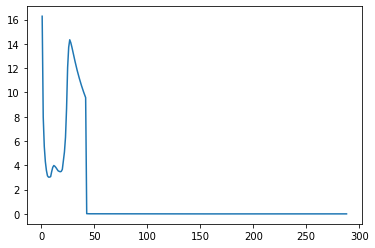

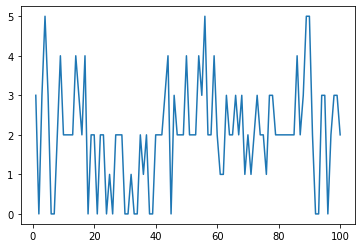

In [5]:
evaluate_hyperparameters(1,1)

Training: 1 2


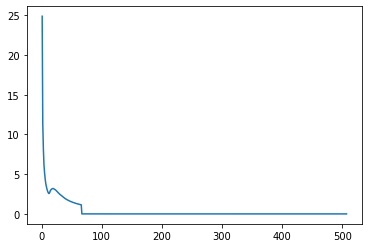

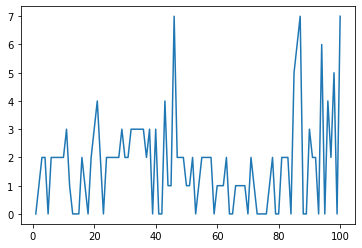

In [6]:
evaluate_hyperparameters(1,2)

Training: 1 3


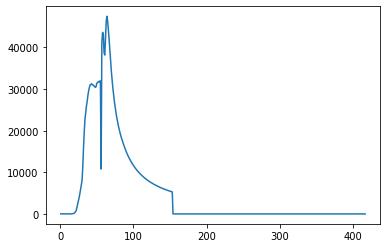

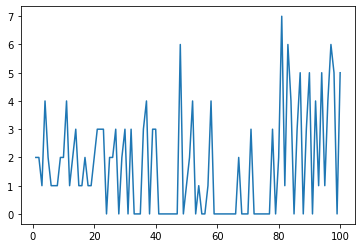

In [7]:
evaluate_hyperparameters(1,3)

Training: 2 1


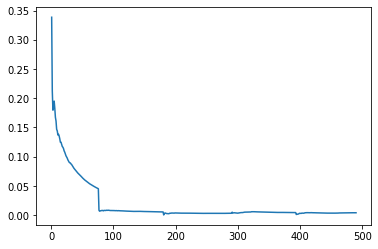

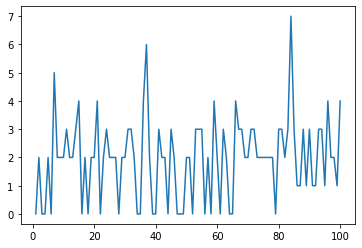

In [8]:
evaluate_hyperparameters(2,1)

Training: 2 2


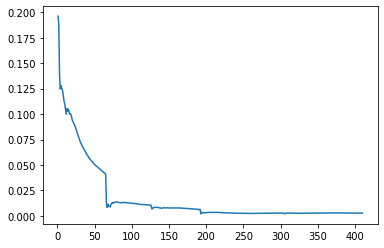

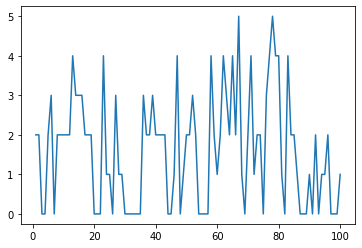

In [9]:
evaluate_hyperparameters(2,2)

Training: 2 3


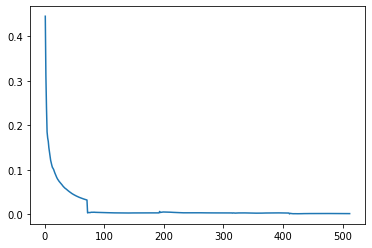

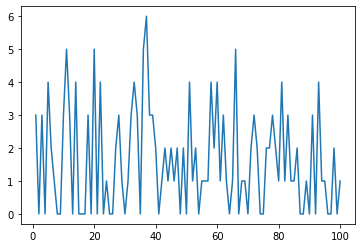

In [10]:
evaluate_hyperparameters(2,3)

Training: 3 1


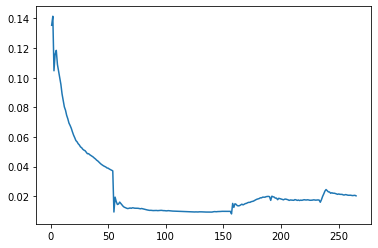

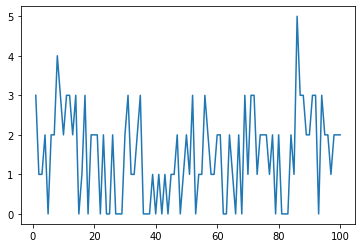

In [11]:
evaluate_hyperparameters(3,1)

Training: 3 2


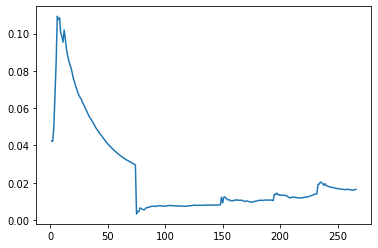

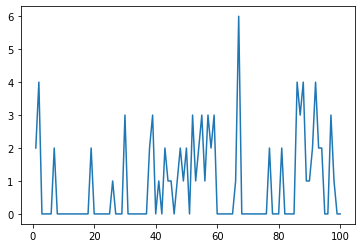

In [12]:
evaluate_hyperparameters(3,2)

Training: 3 3


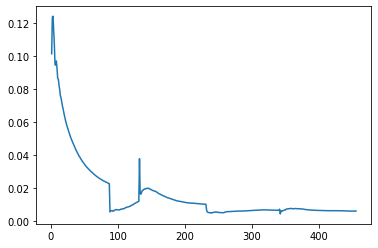

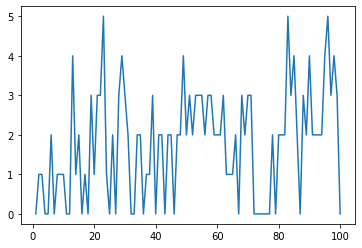

In [13]:
evaluate_hyperparameters(3,3)

Training stages with learning rate = 25e-7 seem to be the best, as the loss seems to converge towards zero and doesn't fluctuate much. They are very similar, so we will arbitrarily choose batch size of 32 (as also suggested in the paper). We don't really consider plots of rewards, because the tested models didn't have enough time to learn any reasonable strategy.

### Training

In [3]:
dqn_predictor = Predictor(**hyperparameters)

In [4]:
from dqn_implementation.model import DQN
dqn_model = DQN(action_count=4)

In [7]:
dqn_predictor.set_model_from_file("../models/dqn_cp_1.pt")

In [5]:
dqn_predictor.set_model(dqn_model)

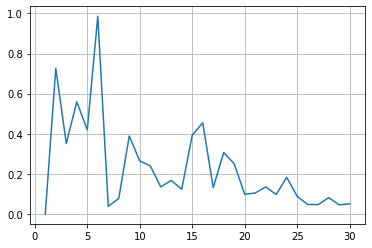

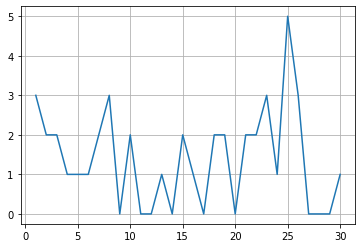

In [3]:
dqn_predictor = Predictor(**hyperparameters)
stages = 3

training_params = {
    "epochs": 10,
    "optimizer": optim.RMSprop(dqn_predictor.dqn_new.parameters(), lr=25e-7, momentum=0.95, eps=0.01, alpha=0.95),
    "batch_size": 32
}

for stage in tqdm(range(stages)):
    dqn_predictor.train(**training_params, cp_name = f"dqn_cp_{stage+1}", stages = stages, stage = stage)

dqn_predictor.plot_losses()
dqn_predictor.plot_rewards()

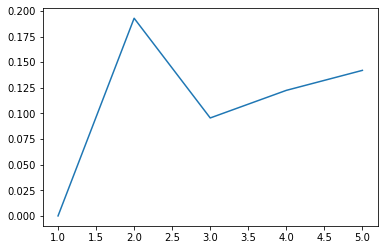

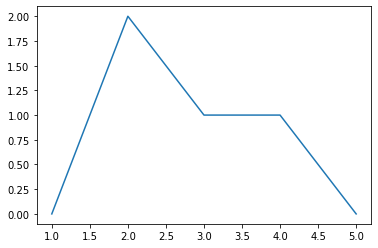

In [4]:
dqn_predictor.plot_losses(0, list(range(5)))
dqn_predictor.plot_rewards(0, list(range(5)))

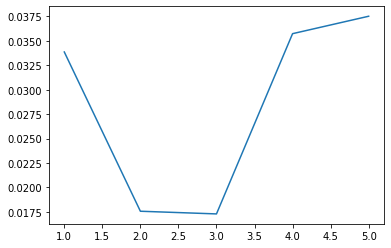

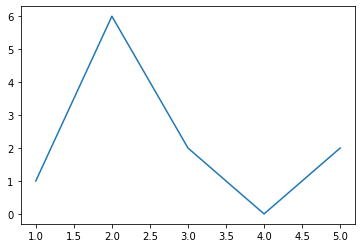

In [5]:
dqn_predictor.plot_losses(2, list(range(5, 10)))
dqn_predictor.plot_rewards(2, list(range(5, 10)))

In [5]:
dqn_predictor.visualize(5, epsilon = 1.0, render = True, frame_delay = 0.01)

In [5]:
dqn_predictor.visualize(5, epsilon = 1.0, render = True, time_limit = 20.0)

In [ ]:
# TODO redo hyperparameter search